In [1]:
from matplotlib.ticker import ScalarFormatter

class OOMFormatter(ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        if self._useMathText:
            self.format = r'$\mathdefault{%s}$' % self.format

In [51]:
from utils.analysis import Tree
from utils.fileUtils.sr import NMSSM_MX_700_MY_400, QCD_B_List, TTJets
from utils.fileUtils.sr import NMSSM_List
from utils.fileUtils import *
from utils.xsecUtils import *
from utils.plotter import Hist, Hist2d
from utils.useCMSstyle import *

In [4]:
import awkward as ak
import numpy as np
import uproot

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.lines as lines
import matplotlib.patches as patches

In [6]:
def x_bins(bins):
    return (bins[:-1] + bins[1:])/2

In [7]:
from utils.cutConfig import jet_btagWP

tight_b = jet_btagWP[1]
medium_b = jet_btagWP[2]
loose_b = jet_btagWP[3]

In [7]:
signal_tree = Tree(NMSSM_MX_700_MY_400)
# bkgd_tree = Tree(QCD_B_List + [TTJets])

In [ ]:
signal_tree.

In [3]:
btag_sort_mask = ak.argsort(signal_tree.get('jet_btag'), axis=1)

In [4]:
nfound_btag = ak.sum(signal_tree.get('jet_signalId')[:, :6] > -1, axis=1)
nfound_btag

<Array [6, 6, 4, 5, 4, 6, ... 5, 5, 5, 5, 6, 5] type='200264 * int64'>

In [5]:
pt_bins = np.linspace(0,300,50)
score_bins = np.linspace(0,1,100)
mH_bins = np.linspace(0,300,50)
x = x_bins(score_bins)

In [6]:
signal_tree.b_3d_score

<Array [0.995, 0.992, 0.848, ... 0.993, 0.981] type='200264 * float32'>

In [8]:
score_3d = signal_tree.b_3d_score
n_higgs = signal_tree.nfound_nn_h
n_signal = signal_tree.nfound_nn

In [9]:
HX_found = ak.any(signal_tree.nn_higgs_signalId == 0, axis=1)
H1_found = ak.any(signal_tree.nn_higgs_signalId == 1, axis=1)
H2_found = ak.any(signal_tree.nn_higgs_signalId == 2, axis=1)

In [10]:
HX_mass = signal_tree.nn_higgs_m[signal_tree.nn_higgs_signalId == 0]
H1_mass = signal_tree.nn_higgs_m[signal_tree.nn_higgs_signalId == 1]
H2_mass = signal_tree.nn_higgs_m[signal_tree.nn_higgs_signalId == 2]

Text(0, 1, 'Events')

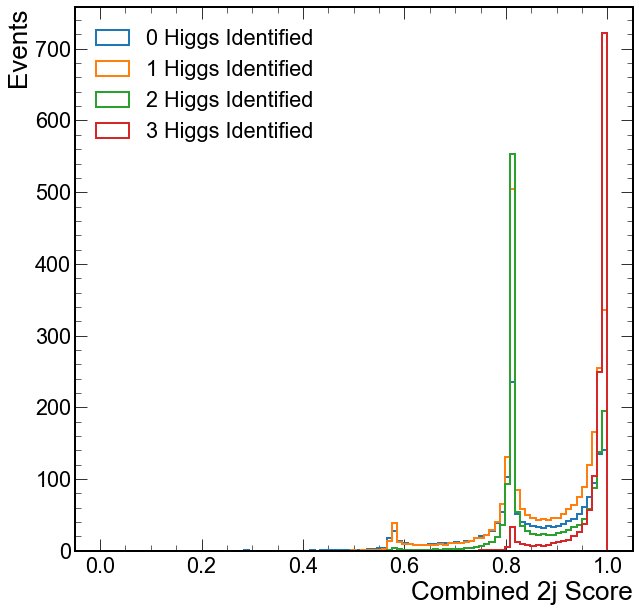

In [12]:
fig, ax = plt.subplots()

n, b = Hist(score_3d[n_higgs == 0], bins=score_bins, scale=signal_tree.scale, label=f"0 Higgs Identified", ax=ax)
n, b = Hist(score_3d[n_higgs == 1], bins=score_bins, scale=signal_tree.scale, label=f"1 Higgs Identified", ax=ax)
n, b = Hist(score_3d[n_higgs == 2], bins=score_bins, scale=signal_tree.scale, label=f"2 Higgs Identified", ax=ax)
n, b = Hist(score_3d[n_higgs == 3], bins=score_bins, scale=signal_tree.scale, label=f"3 Higgs Identified", ax=ax)
ax.legend(loc=2)
ax.set_xlabel("Combined 2j Score")
ax.set_ylabel("Events")

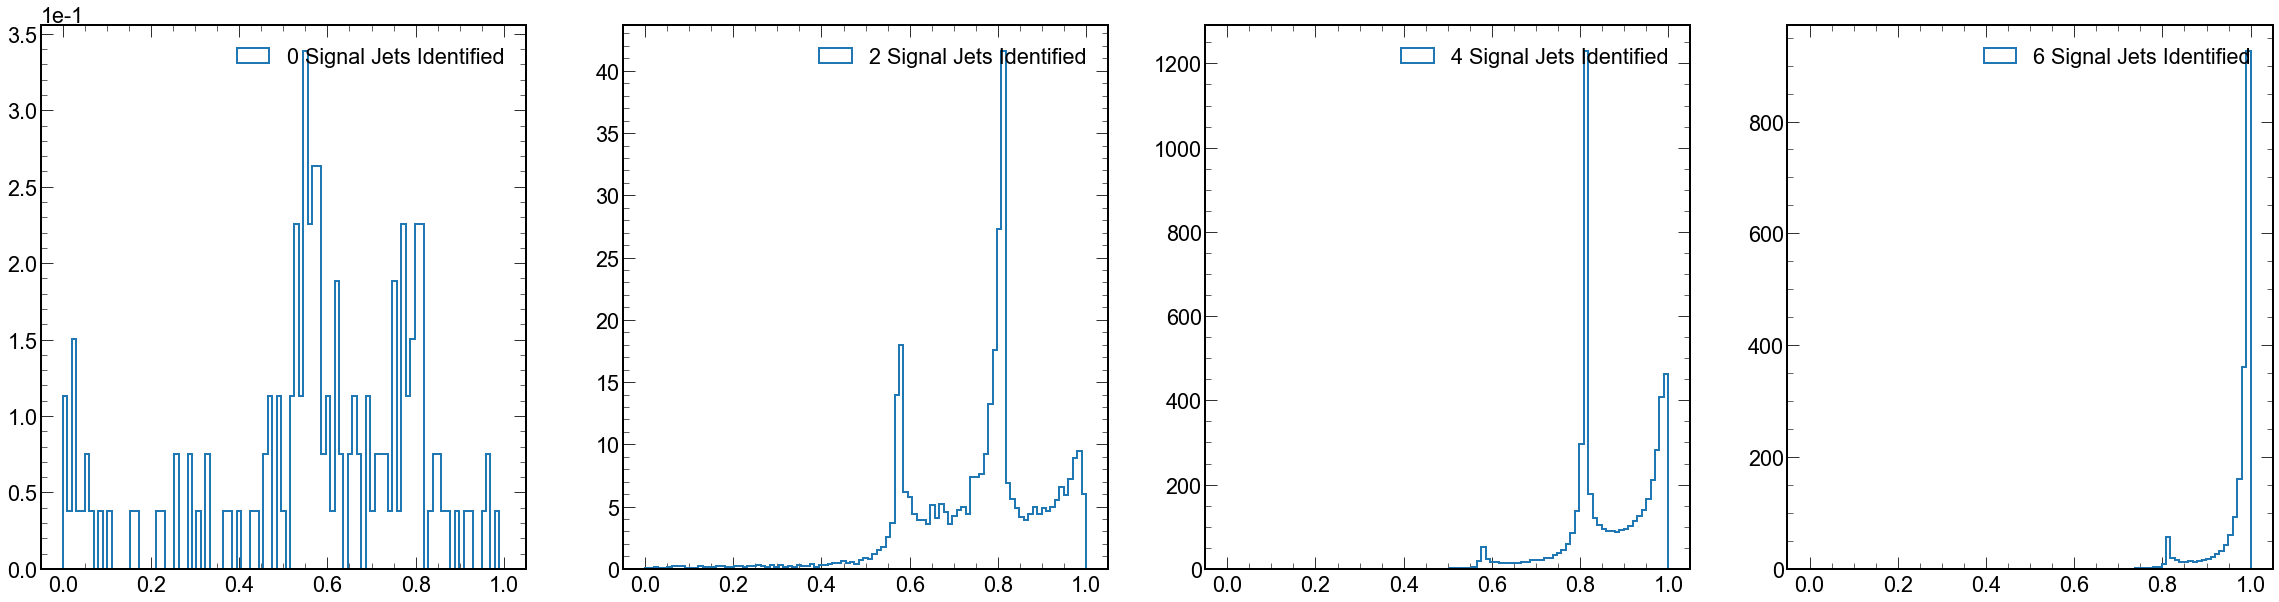

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(40,10))

ax = axs[0]
n, b = Hist(score_3d[(n_signal == 0) | (n_signal == 1)], bins=score_bins, scale=signal_tree.scale, label=f"0 Signal Jets Identified", ax=ax)
ax = axs[1]
n, b = Hist(score_3d[(n_signal == 2) | (n_signal == 3)], bins=score_bins, scale=signal_tree.scale, label=f"2 Signal Jets Identified", ax=ax)
ax = axs[2]
n, b = Hist(score_3d[(n_signal == 4) | (n_signal == 5)], bins=score_bins, scale=signal_tree.scale, label=f"4 Signal Jets Identified", ax=ax)
ax = axs[3]
n, b = Hist(score_3d[n_signal == 6], bins=score_bins, scale=signal_tree.scale, label=f"6 Signal Jets Identified", ax=ax)

In [45]:
score_3d[n_higgs == 1]

<Array [0.848, 0.993, 0.99, ... 0.962, 0.981] type='72079 * float32'>

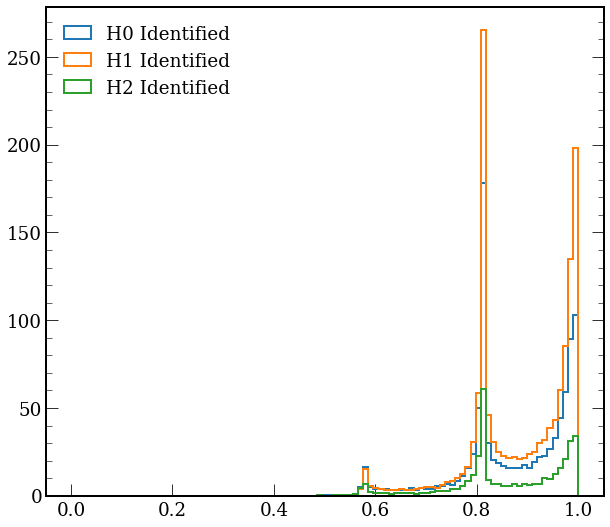

In [50]:
fig, ax = plt.subplots()

n, b = Hist(score_3d[(n_higgs == 1) & (HX_found)], bins=score_bins, scale=signal_tree.scale, label=f"H0 Identified", ax=ax)
n, b = Hist(score_3d[(n_higgs == 1) & (H1_found)], bins=score_bins, scale=signal_tree.scale, label=f"H1 Identified", ax=ax)
n, b = Hist(score_3d[(n_higgs == 1) & (H2_found)], bins=score_bins, scale=signal_tree.scale, label=f"H2 Identified", ax=ax)
ax.legend(loc=2)

In [76]:
id_higgs_1

NameError: name 'id_higgs_1' is not defined

In [79]:
id_higgs_1 = signal_tree.nn_higgs_signalId[n_higgs == 1]
HX_mass_1H = ak.flatten(signal_tree.nn_higgs_m[n_higgs == 1][id_higgs_1 == 0])

In [66]:
ak.sum(n_higgs[HX_found] == 1)

25858

In [63]:
 score_3d[(n_higgs == 1) & (HX_found)]

<Array [0.848, 0.815, 0.993, ... 0.997, 0.996] type='25858 * float32'>

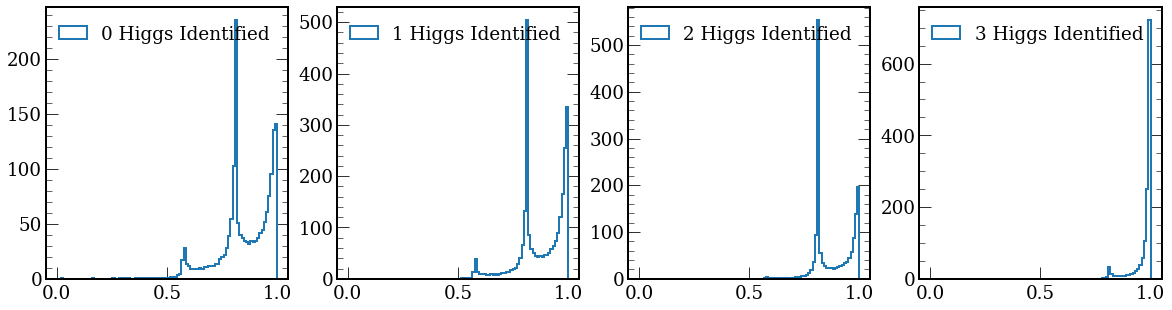

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,5))

ax = axs[0]
n, b = Hist(score_3d[n_higgs == 0], bins=score_bins, scale=signal_tree.scale, label=f"0 Higgs Identified", ax=ax)
ax = axs[1]
n, b = Hist(score_3d[n_higgs == 1], bins=score_bins, scale=signal_tree.scale, label=f"1 Higgs Identified", ax=ax)
ax = axs[2]
n, b = Hist(score_3d[n_higgs == 2], bins=score_bins, scale=signal_tree.scale, label=f"2 Higgs Identified", ax=ax)
ax = axs[3]
n, b = Hist(score_3d[n_higgs == 3], bins=score_bins, scale=signal_tree.scale, label=f"3 Higgs Identified", ax=ax)

NameError: name 'best_bkgd_score' is not defined

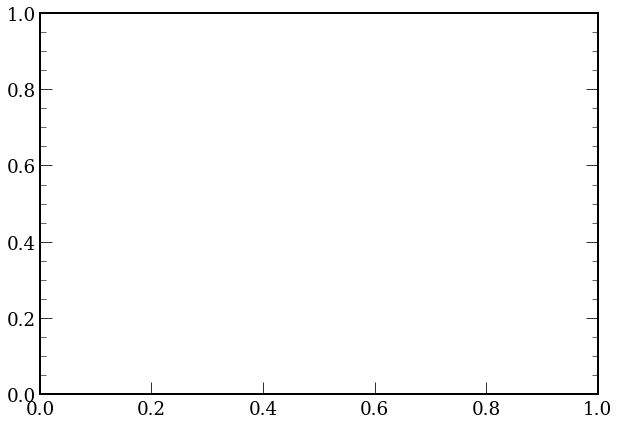

In [9]:
fig, ax = plt.subplots(figsize=(10,7))
_ = plot(x=bkgd_tree.b_6, bins=score_bins, ax=ax, linewidth=2)#, label='Highest Scoring Combos')
ax.set_xlabel('6-Jet Classifier Score')
ax.set_ylabel('Percentage of Events')
ax.set_title('Highest Scoring Background')

# fig.savefig('plots/QCD_hi_score.pdf')

NameError: name 'hi_score_correct_sgnl' is not defined

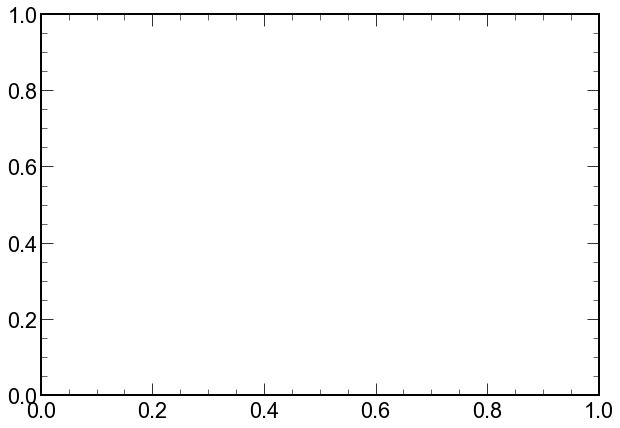

In [15]:
fig, ax = plt.subplots(figsize=(10,7))
n, b = np.histogram(signal_tree.b_6j_score.to_numpy(), hi_score_correct_sgnl[1])
_ = plot(x=x_bins(b), weights=n/n.sum()*100, bins=b, ax=ax, linewidth=2, label='All events')
_ = plot(x=x_bins(b), weights=hi_score_correct_sgnl[0]/n.sum()*100, bins=b, ax=ax, linewidth=2, label='Accurate event combo')
ax.set_xlabel('Highest 6j Score in Event')
ax.set_ylabel('Percentage of Events')
ax.set_title(r'$m_X = 700$ GeV, $m_Y = 400$ GeV', loc='right')
ax.legend(loc=2)

# fig.savefig('plots/sgnl_hi_score.pdf')

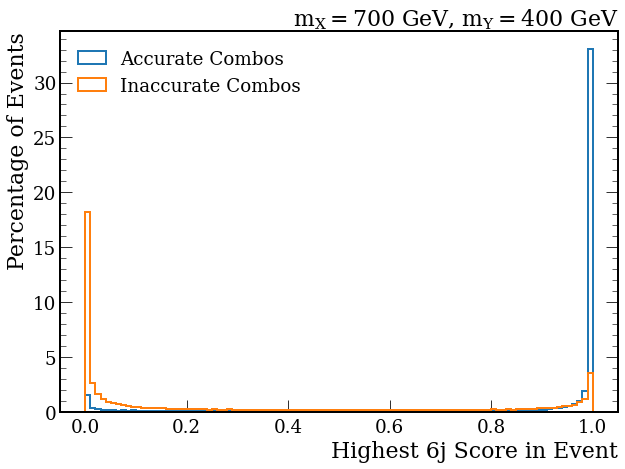

In [140]:
fig, ax = plt.subplots(figsize=(10,7))
n, b = np.histogram(signal_tree.b_6j_score.to_numpy(), hi_score_correct_sgnl[1])
_ = plot(x=x_bins(b), weights=hi_score_correct_sgnl[0]/n.sum()*100, bins=b, ax=ax, linewidth=2, label='Accurate Combos')
_ = plot(x=x_bins(b), weights=(n-hi_score_correct_sgnl[0])/n.sum()*100, bins=b, ax=ax, linewidth=2, label='Inaccurate Combos')
ax.set_xlabel('Highest 6j Score in Event')
ax.set_ylabel('Percentage of Events')
ax.set_title(r'$m_X = 700$ GeV, $m_Y = 400$ GeV', loc='right')
ax.legend(loc=2)

fig.savefig('plots/sgnl_accurate_hi_score.pdf')

In [141]:
accurate_score = hi_score_correct_sgnl[0]
inaccurate_score = n - hi_score_correct_sgnl[0]

acc_pass = np.zeros_like(b[:-1])
inacc_pass = np.zeros_like(b[:-1])
for i,cut in enumerate(b[:-1]):
    acc_pass[i] += accurate_score[b[:-1] >= cut].sum()
    inacc_pass[i] += inaccurate_score[b[:-1] >= cut].sum()

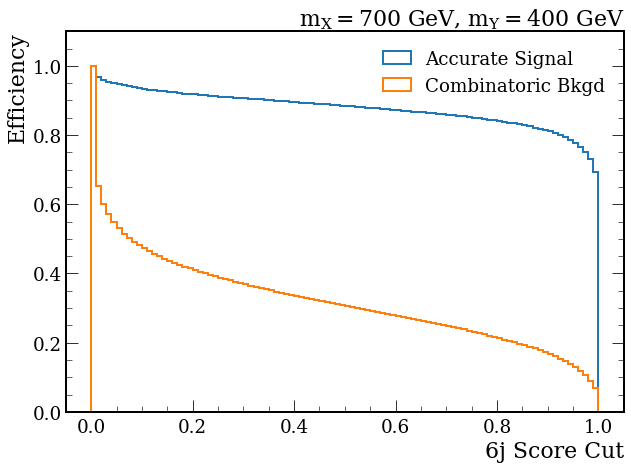

In [151]:
fig, ax = plt.subplots(figsize=(10,7))
_ = plot(x=x_bins(b), weights=acc_pass/accurate_score.sum(), bins=b, ax=ax, linewidth=2, label='Accurate Signal')
_ = plot(x=x_bins(b), weights=inacc_pass/inaccurate_score.sum(), bins=b, ax=ax, linewidth=2, label='Combinatoric Bkgd')
ax.set_xlabel('6j Score Cut')
ax.set_ylabel('Efficiency')
ax.set_title(r'$m_X = 700$ GeV, $m_Y = 400$ GeV', loc='right')
ax.legend(loc=1)
ax.set_ylim(0,1.1)
ax.minorticks_on()
fig.savefig('plots/sgnl_6j-score_efficiency.pdf')

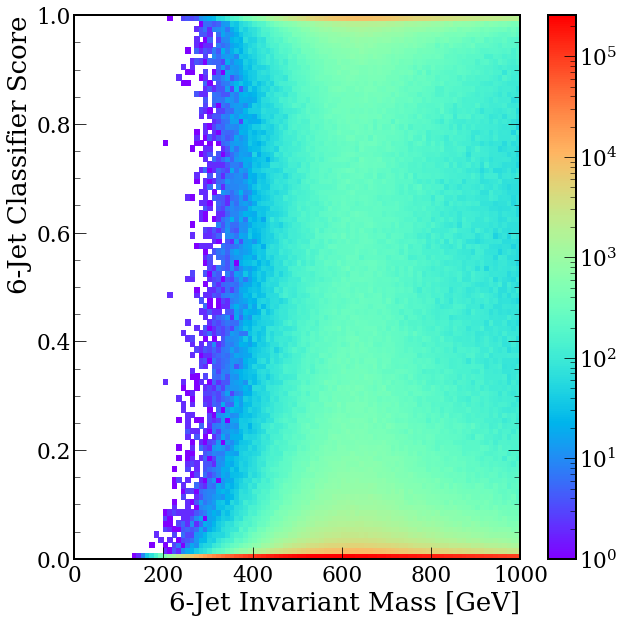

In [ ]:
fig, ax = plt.subplots()
pcm = ax.pcolormesh(h_m_s[1], h_m_s[2], h_m_s[0].T, norm=colors.LogNorm(vmin=1, vmax=h_m_s[0].max()), cmap='rainbow')
fig.colorbar(pcm, ax=ax)
ax.set_xlabel('6-Jet Invariant Mass [GeV]')
ax.set_ylabel('6-Jet Classifier Score')
ax.set_title(r'$m_X = 700$ GeV, $m_Y = 400$ GeV', loc='right')

fig.savefig('plots/mass_score.pdf', bbox_inches='tight')

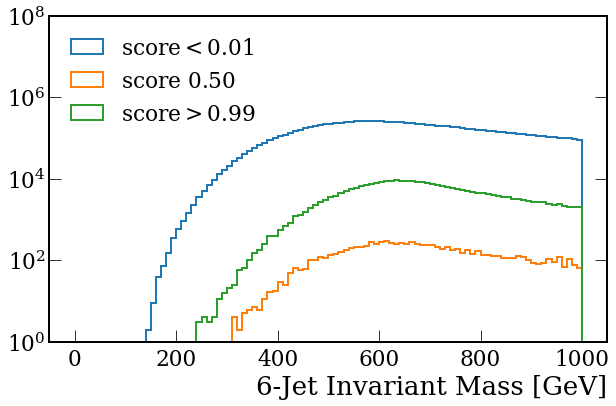

In [ ]:
x = (h_m_s[1][:-1]+h_m_s[1][1:])/2
n, b = plot(x=x, weights=h_m_s[0].T[0], bins=h_m_s[1], label=r'$score<0.01$', linewidth=2)
n, b = plot(x=x, weights=h_m_s[0].T[50], bins=h_m_s[1], label=r'$score~0.50$', linewidth=2, ax=ax)
n, b = plot(x=x, weights=h_m_s[0].T[-1], bins=h_m_s[1], label=r'$score>0.99$', linewidth=2, ax=ax)
ax.set_yscale('log')
ax.set_ylim(1,1e8)
ax.legend(loc=2)
ax.set_xlabel('6-Jet Invariant Mass [GeV]')
ax.set_title(r'$m_X = 700$ GeV, $m_Y = 400$ GeV', loc='right')
fig.savefig('plots/mass_score_snapshot.pdf', bbox_inches='tight')
# ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useOffset=True, useMathText=True)

In [ ]:
score_cut = 0.13
print(f"False positive rate = {h_incorrect[x_h > score_cut].sum()/h_incorrect.sum()*100:.1f}%")
print(f"True positive rate = {h_s_w[x_h > score_cut].sum()/h_s_w.sum()*100:.1f}%")

False positive rate = 10.0%
True positive rate = 81.0%


In [ ]:
score_cut = 0.99
print(f"False positive rate = {h_incorrect[x_h > score_cut].sum()/h_incorrect.sum()*100:.1f}%")
print(f"True positive rate = {h_s_w[x_h > score_cut].sum()/h_s_w.sum()*100:.1f}%")

False positive rate = 1.8%
True positive rate = 53.9%


In [ ]:
total = h_s_w.sum() + h_incorrect.sum()
for cut in np.arange(0,1.01,0.01):
    tpr = h_s_w[x_h > score_cut].sum()/total
    fpr = h_incorrect[x_h > score_cut].sum()/total

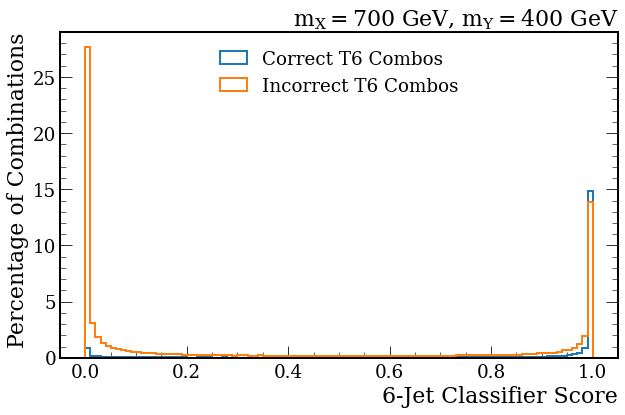

In [74]:
# n, bins = plot(x=x_h, weights=h_top6_score_w/h_top6_score_w.sum(), bins=h_bins, linewidth=2, label='Top 6 combos')
h_total = h_top6_signal_w.sum() + h_top6_incorrect.sum()
n, bins = plot(x=x_h, weights=h_top6_signal_w/h_total*100, bins=h_bins, linewidth=2, label='Correct T6 Combos')#, ax=ax)
n, bins = plot(x=x_h, weights=h_top6_incorrect/h_total*100, bins=h_bins, linewidth=2, label='Incorrect T6 Combos', ax=ax)
ax.legend(loc=9)
ax.set_xlabel('6-Jet Classifier Score')
ax.set_ylabel('Percentage of Combinations')
# ax.set_xticks(ax.get_xticks(), minor=True)
# ax.tick_params(axis='x', which='minor')
ax.minorticks_on()
ax.set_title(r'$m_X = 700$ GeV, $m_Y = 400$ GeV', loc='right')
fig.savefig("plots/t6_nn_perf.pdf", bbox_inches='tight')

In [ ]:
h_top6_incorrect[x_h > 0.8].sum()/h_top6_incorrect.sum()

0.30886748

In [ ]:
h_top6_signal_w[x_h > 0.8].sum()/h_top6_signal_w.sum()

0.8282781

In [7]:
N_signal = ak.sum(signal_tree.jet_signalId > -1, axis=1)
n_signal = ak.sum(signal_tree.jet_signalId[:,:6] > -1, axis=1)

AttributeError: 'Tree' object has no attribute 'jet_signalId'

In [ ]:
HX1 = ak.sum(signal_tree.jet_signalId == 0, axis=1)
HX2 = ak.sum(signal_tree.jet_signalId == 1, axis=1)
HX_mask = ((HX1 + HX2) == 2)*1

H11 = ak.sum(signal_tree.jet_signalId == 2, axis=1)
H12 = ak.sum(signal_tree.jet_signalId == 3, axis=1)
H1_mask = ((H11 + H12) == 2)*1

H21 = ak.sum(signal_tree.jet_signalId == 4, axis=1)
H22 = ak.sum(signal_tree.jet_signalId == 5, axis=1)
H2_mask = ((H21 + H22) == 2)*1

In [ ]:
true_H_count = HX_mask + H1_mask + H2_mask

In [ ]:
n_nn_signal = ak.sum(signal_tree.nn_jet_signalId > 1, axis=1)

In [ ]:
print(ak.sum(N_signal == 6) / len(n_signal))
print(ak.sum(n_signal == 6) / len(n_signal))

0.3450439211481359
0.2504948861761795


In [ ]:
quality_mask = signal_tree.b_6j_score > 0.8

In [ ]:
signal_tree.nfound

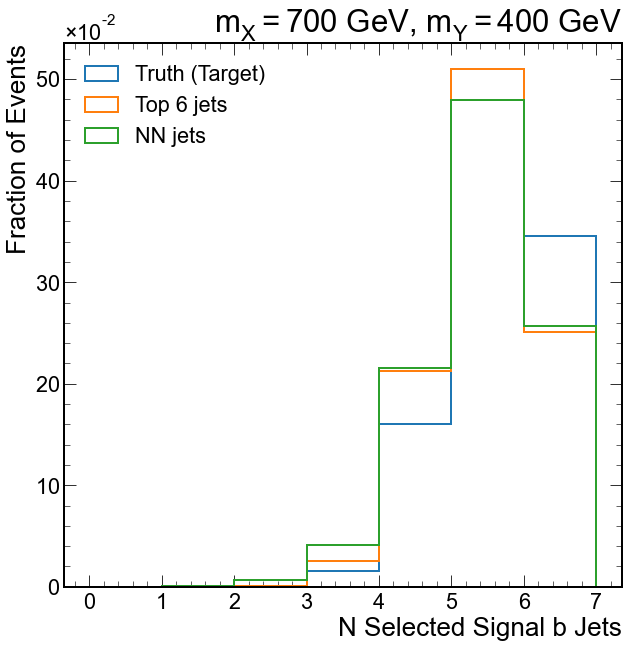

In [25]:
fig, ax = plt.subplots()

n, b = Hist(x=signal_tree.get('nfound_presel'), bins=np.arange(8), linewidth=2, label='Truth (Target)', ax=ax, density=1)
n, b = Hist(x=signal_tree.get('nfound_t6'), bins=np.arange(8), linewidth=2, ax=ax, label='Top 6 jets', density=1)
n, b = Hist(x=signal_tree.get('nfound_nn'), bins=np.arange(8), linewidth=2, ax=ax, label='NN jets', density=1)
# n, b = Hist(x=nfound_btag, bins=np.arange(8), linewidth=2, ax=ax, label='Top b-tagged')
ax.set_xlabel('N Selected Signal b Jets')
ax.set_ylabel('Fraction of Events')
ax.set_title(r'$m_X = 700$ GeV, $m_Y = 400$ GeV', loc='right')
ax.legend(loc=2)
ax.yaxis.set_major_formatter(OOMFormatter(-2, "%2.0f"))
# ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,4))
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
# fig.savefig('plots/b_jet_dist.pdf', bbox_inches='tight')
fig.savefig('plots/found_b_jets.pdf')

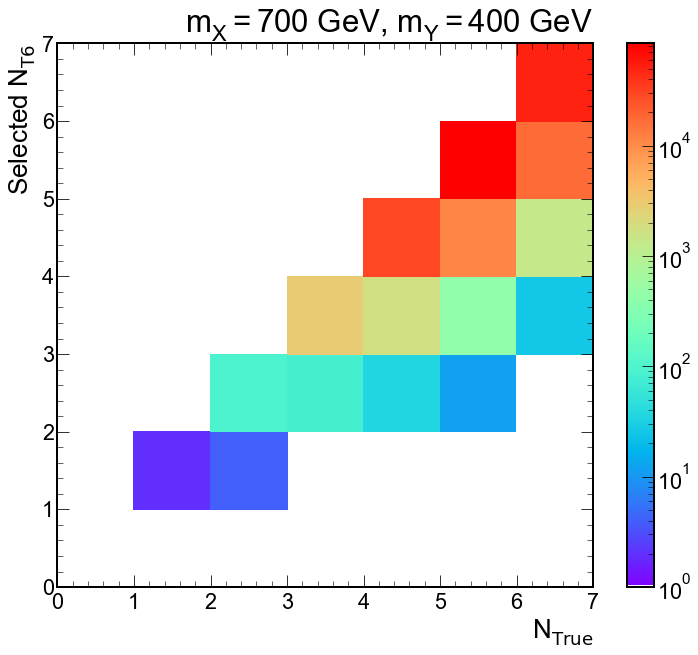

In [13]:
fig, ax = plt.subplots(figsize=(12,10))

n,xe,xy,im = Hist2d(ax=ax,
    x=signal_tree.get('nfound_presel').to_numpy(), 
    y=signal_tree.get('nfound_t6').to_numpy(),
    bins=(np.arange(8),np.arange(8)))

fig.colorbar(im, ax=ax)

# n, b = Hist(x=signal_tree.get('nfound_presel'), bins=np.arange(8), linewidth=2, label='Truth (Target)', ax=ax)
# n, b = Hist(x=signal_tree.get('nfound_t6'), bins=np.arange(8), linewidth=2, ax=ax, label='Top 6 jets')
# n, b = Hist(x=signal_tree.get('nfound_nn'), bins=np.arange(8), linewidth=2, ax=ax, label='NN jets')
# n, b = Hist(x=nfound_btag, bins=np.arange(8), linewidth=2, ax=ax, label='Top b-tagged')
ax.set_xlabel(r'$N_\mathrm{True}$')
ax.set_ylabel(r'Selected $N_\mathrm{T6}$')
ax.set_title(r'$m_X = 700$ GeV, $m_Y = 400$ GeV', loc='right')
# ax.legend(loc=2)
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
# fig.savefig('plots/b_jet_dist.pdf', bbox_inches='tight')
fig.savefig('plots/found_b_jets_T6.pdf')

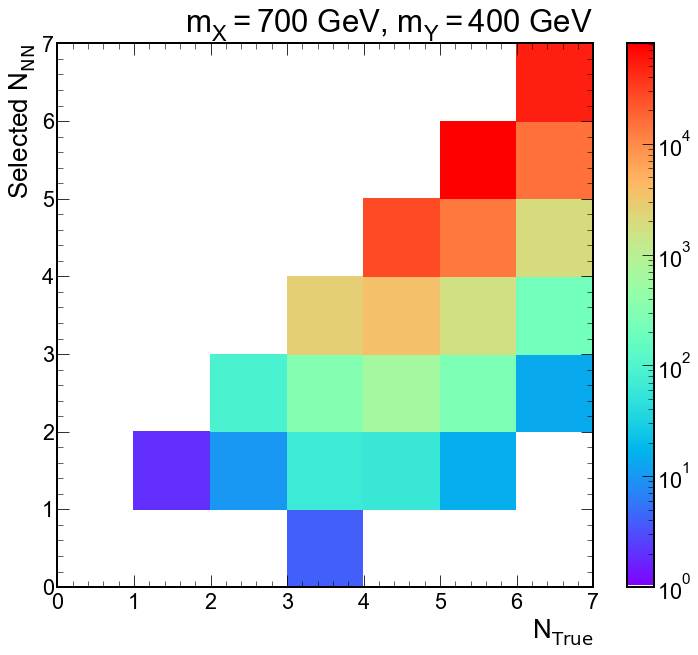

In [14]:
fig, ax = plt.subplots(figsize=(12,10))

n,xe,xy,im = Hist2d(ax=ax,
    x=signal_tree.get('nfound_presel').to_numpy(), 
    y=signal_tree.get('nfound_nn').to_numpy(),
    bins=(np.arange(8),np.arange(8)))

fig.colorbar(im, ax=ax)

# n, b = Hist(x=signal_tree.get('nfound_presel'), bins=np.arange(8), linewidth=2, label='Truth (Target)', ax=ax)
# n, b = Hist(x=signal_tree.get('nfound_t6'), bins=np.arange(8), linewidth=2, ax=ax, label='Top 6 jets')
# n, b = Hist(x=signal_tree.get('nfound_nn'), bins=np.arange(8), linewidth=2, ax=ax, label='NN jets')
# n, b = Hist(x=nfound_btag, bins=np.arange(8), linewidth=2, ax=ax, label='Top b-tagged')
ax.set_xlabel(r'$N_\mathrm{True}$')
ax.set_ylabel(r'Selected $N_\mathrm{NN}$')
ax.set_title(r'$m_X = 700$ GeV, $m_Y = 400$ GeV', loc='right')
# ax.legend(loc=2)
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
# fig.savefig('plots/b_jet_dist.pdf', bbox_inches='tight')
fig.savefig('plots/found_b_jets_NN.pdf')

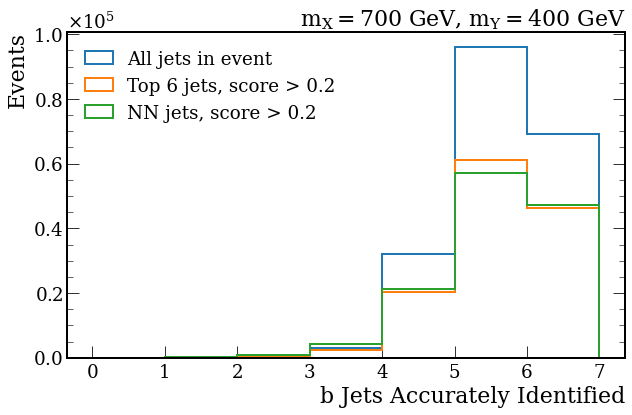

In [133]:
score_cut = 0.2
n, b = plot(x=N_signal, bins=np.arange(8), linewidth=2, label='All jets in event')
n, b = plot(x=signal_tree.nfound_t6[signal_tree.b_6j_score > score_cut], bins=np.arange(8), linewidth=2, ax=ax, label=f'Top 6 jets, score > {score_cut}')
n, b = plot(x=signal_tree.nfound_nn[signal_tree.b_6j_score > score_cut], bins=np.arange(8), linewidth=2, ax=ax, label=f'NN jets, score > {score_cut}')
ax.set_xlabel('b Jets Accurately Identified')
ax.set_ylabel('Events')
ax.set_title(r'$m_X = 700$ GeV, $m_Y = 400$ GeV', loc='right')
ax.legend(loc=2)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
fig.savefig('plots/b_jet_dist_score_cut.pdf', bbox_inches='tight')

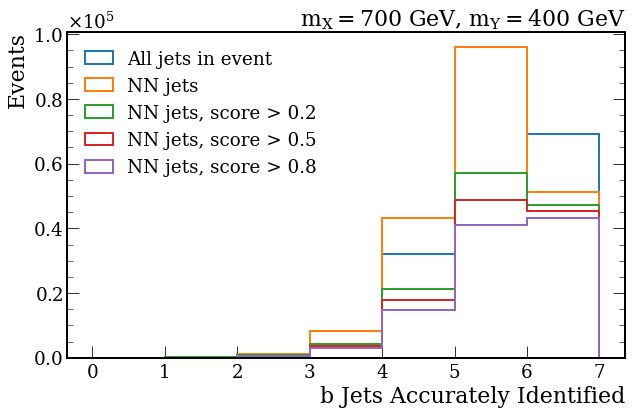

In [134]:
n, b = plot(x=N_signal, bins=np.arange(8), linewidth=2, label='All jets in event')
# n, b = plot(x=signal_tree.nfound_t6[signal_tree.b_6j_score > score_cut], bins=np.arange(8), linewidth=2, ax=ax, label=f'Top 6 jets, score > {score_cut}')
n, b = plot(x=signal_tree.nfound_nn, bins=np.arange(8), linewidth=2, ax=ax, label=f'NN jets')
score_cut = 0.2
n, b = plot(x=signal_tree.nfound_nn[signal_tree.b_6j_score > score_cut], bins=np.arange(8), linewidth=2, ax=ax, label=f'NN jets, score > {score_cut}')
score_cut = 0.5
n, b = plot(x=signal_tree.nfound_nn[signal_tree.b_6j_score > score_cut], bins=np.arange(8), linewidth=2, ax=ax, label=f'NN jets, score > {score_cut}')
score_cut = 0.8
n, b = plot(x=signal_tree.nfound_nn[signal_tree.b_6j_score > score_cut], bins=np.arange(8), linewidth=2, ax=ax, label=f'NN jets, score > {score_cut}')
ax.set_xlabel('b Jets Accurately Identified')
ax.set_ylabel('Events')
ax.set_title(r'$m_X = 700$ GeV, $m_Y = 400$ GeV', loc='right')
ax.legend(loc=2)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
# fig.savefig('plots/b_jet_dist_score_cut.pdf', bbox_inches='tight')

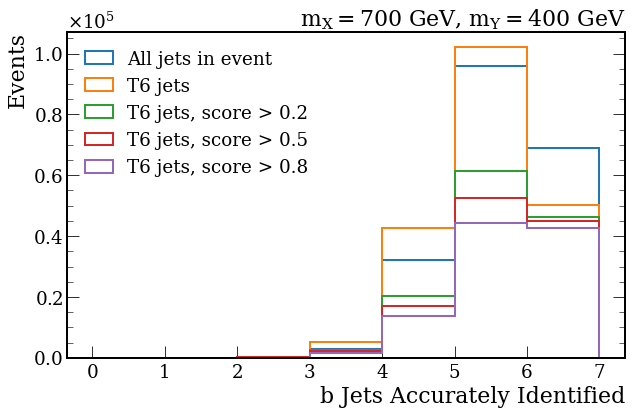

In [135]:
n, b = plot(x=N_signal, bins=np.arange(8), linewidth=2, label='All jets in event')
# n, b = plot(x=signal_tree.nfound_t6[signal_tree.b_6j_score > score_cut], bins=np.arange(8), linewidth=2, ax=ax, label=f'Top 6 jets, score > {score_cut}')
n, b = plot(x=signal_tree.nfound_t6, bins=np.arange(8), linewidth=2, ax=ax, label=f'T6 jets')
score_cut = 0.2
n, b = plot(x=signal_tree.nfound_t6[signal_tree.b_6j_score > score_cut], bins=np.arange(8), linewidth=2, ax=ax, label=f'T6 jets, score > {score_cut}')
score_cut = 0.5
n, b = plot(x=signal_tree.nfound_t6[signal_tree.b_6j_score > score_cut], bins=np.arange(8), linewidth=2, ax=ax, label=f'T6 jets, score > {score_cut}')
score_cut = 0.8
n, b = plot(x=signal_tree.nfound_t6[signal_tree.b_6j_score > score_cut], bins=np.arange(8), linewidth=2, ax=ax, label=f'T6 jets, score > {score_cut}')
ax.set_xlabel('b Jets Accurately Identified')
ax.set_ylabel('Events')
ax.set_title(r'$m_X = 700$ GeV, $m_Y = 400$ GeV', loc='right')
ax.legend(loc=2)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
# fig.savefig('plots/b_jet_dist_score_cut.pdf', bbox_inches='tight')

In [117]:
HX1_mask = ak.any(signal_tree.jet_signalId == 0, axis=1)
HX2_mask = ak.any(signal_tree.jet_signalId == 1, axis=1)
HX_mask = HX1_mask & HX2_mask
HX_mask = HX_mask*1
H11_mask = ak.any(signal_tree.jet_signalId == 2, axis=1)
H12_mask = ak.any(signal_tree.jet_signalId == 3, axis=1)
H1_mask = H11_mask & H12_mask
HX_mask = H1_mask*1
H21_mask = ak.any(signal_tree.jet_signalId == 4, axis=1)
H22_mask = ak.any(signal_tree.jet_signalId == 5, axis=1)
H2_mask = H21_mask & H22_mask
HX_mask = H2_mask*1

In [118]:
true_H_count = HX_mask + H1_mask + H2_mask

In [119]:
true_H_count

<Array [3, 3, 1, 3, 1, 3, ... 3, 1, 3, 3, 3, 2] type='200259 * int64'>

In [8]:
signal_tree.get('jet_higgsIdx')[2]

<Array [-1, -1, -1, -1, -1, -1] type='6 * int32'>

In [16]:
HX_count = ak.sum((signal_tree.get('jet_signalId') == 0) | (signal_tree.get('jet_signalId') == 1), axis=1) == 2
H1_count = ak.sum((signal_tree.get('jet_signalId') == 2) | (signal_tree.get('jet_signalId') == 3), axis=1) == 2
H2_count = ak.sum((signal_tree.get('jet_signalId') == 4) | (signal_tree.get('jet_signalId') == 5), axis=1) == 2

In [17]:
H_count = HX_count*1 + H1_count*1 + H2_count*1

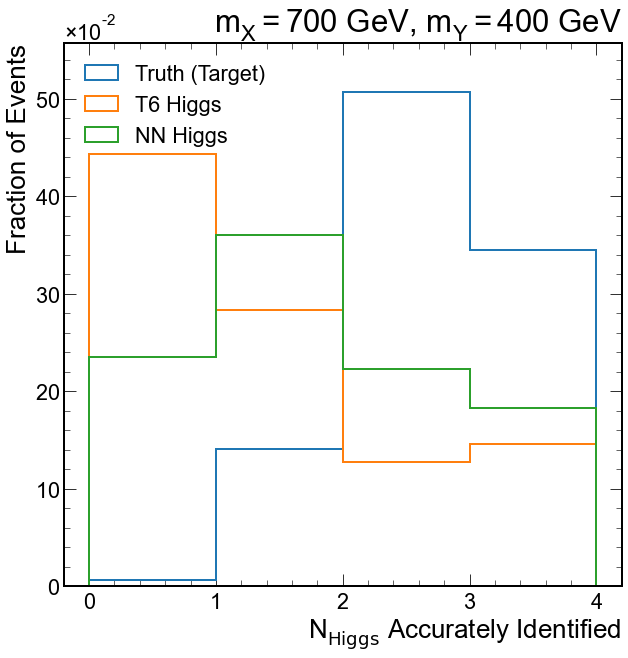

In [26]:
fig, ax = plt.subplots()

n_all, b = Hist(H_count, bins=np.arange(5), linewidth=2, label='Truth (Target)', ax=ax, density=1)
n, b = Hist(signal_tree.get('nfound_t6_h'), bins=np.arange(5), linewidth=2, ax=ax, label='T6 Higgs', density=1)
n, b = Hist(ak.sum(signal_tree.get('nn_higgs_signalId') > -1, axis=1), bins=np.arange(5), linewidth=2, ax=ax, label='NN Higgs', density=1)
ax.set_xlabel(r'$N_\mathrm{Higgs}$ Accurately Identified')
ax.set_ylabel('Fraction of Events')
ax.set_ylim(0, n_all.max()*1.1)
ax.set_title(r'$m_X = 700$ GeV, $m_Y = 400$ GeV', loc='right')
ax.legend(loc=2)
ax.yaxis.set_major_formatter(OOMFormatter(-2, "%2.0f"))
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
fig.savefig('plots/n_higgs_dist.pdf', bbox_inches='tight')

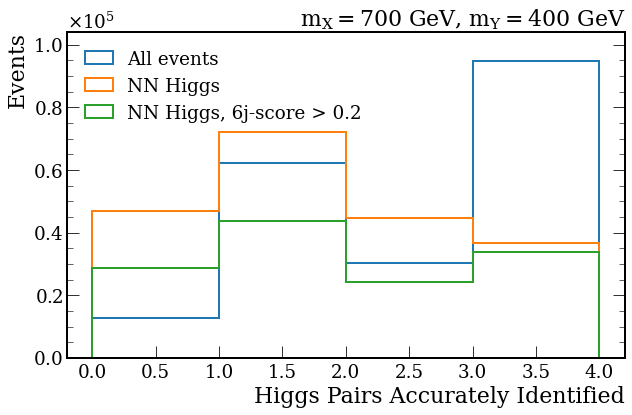

In [137]:
nfound_higgs_nn = ak.sum(signal_tree.nn_higgs_signalId > -1, axis=1)
n_all, b = plot(x=true_H_count, bins=np.arange(5), linewidth=2, label='All events')
# n, b = plot(x=signal_tree.nfound_t6_h, bins=np.arange(5), linewidth=2, ax=ax, label='Top 6 Events')
n, b = plot(x=nfound_higgs_nn, bins=np.arange(5), linewidth=2, ax=ax, label='NN Higgs')
score_cut = 0.2
n, b = plot(x=nfound_higgs_nn[signal_tree.b_6j_score > score_cut], bins=np.arange(5), linewidth=2, ax=ax, label=f'NN Higgs, 6j-score > {score_cut}')
ax.set_ylim(0,n_all.max()*1.1)
ax.set_xlabel('Higgs Pairs Accurately Identified')
ax.set_ylabel('Events')
ax.set_title(r'$m_X = 700$ GeV, $m_Y = 400$ GeV', loc='right')
ax.legend(loc=2)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
# fig.savefig('plots/n_higgs_dist.pdf', bbox_inches='tight')

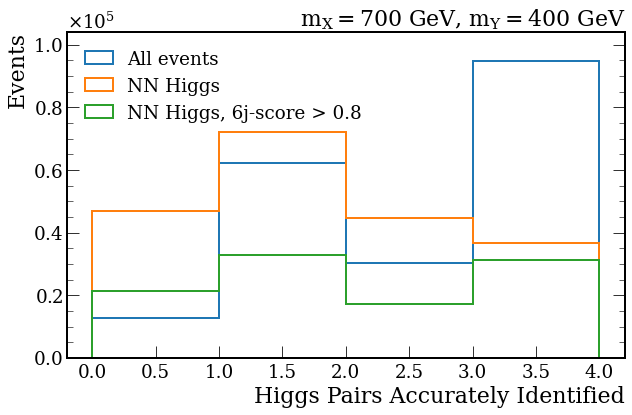

In [138]:
nfound_higgs_nn = ak.sum(signal_tree.nn_higgs_signalId > -1, axis=1)
n_all, b = plot(x=true_H_count, bins=np.arange(5), linewidth=2, label='All events')
# n, b = plot(x=signal_tree.nfound_t6_h, bins=np.arange(5), linewidth=2, ax=ax, label='Top 6 Events')
n, b = plot(x=nfound_higgs_nn, bins=np.arange(5), linewidth=2, ax=ax, label='NN Higgs')
score_cut = 0.8
n, b = plot(x=nfound_higgs_nn[signal_tree.b_6j_score > score_cut], bins=np.arange(5), linewidth=2, ax=ax, label=f'NN Higgs, 6j-score > {score_cut}')
ax.set_ylim(0,n_all.max()*1.1)
ax.set_xlabel('Higgs Pairs Accurately Identified')
ax.set_ylabel('Events')
ax.set_title(r'$m_X = 700$ GeV, $m_Y = 400$ GeV', loc='right')
ax.legend(loc=2)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
# fig.savefig('plots/n_higgs_dist.pdf', bbox_inches='tight')

In [ ]:
n_higgs = ak.sum(signal_tree.t6_higgs_signalId > -1, axis=1)
n_nn_higgs = ak.sum(signal_tree.nn_higgs_signalId > -1, axis=1)

In [ ]:
n, b = plot(x=n_higgs, bins=np.arange(4), linewidth=2, label='All jets in event')
print(n)
n, b = plot(x=n_nn_higgs, bins=np.arange(4), linewidth=2, ax=ax, label='Top 6 jets in event')
print(n)
ax.set_xlabel('Number of b jets')
ax.set_ylabel('Percentage of Events')
ax.legend(loc=2)

In [ ]:
n0 = ak.sum(n_higgs == 0) + ak.sum(n_higgs == 1)
n1 = ak.sum(n_higgs == 2) + ak.sum(n_higgs == 3)
n2 = ak.sum(n_higgs == 4) + ak.sum(n_higgs == 5)
n3 = ak.sum(n_higgs == 6)
n0 + n1 + n2 + n3

In [ ]:
n_t6_higgs = ak.sum(signal_tree.t6_higgs_signalId > -1, axis=1)
n0_t6 = ak.sum(n_t6_higgs == 0) + ak.sum(n_t6_higgs == 1)
n1_t6 = ak.sum(n_t6_higgs == 2) + ak.sum(n_t6_higgs == 3)
n2_t6 = ak.sum(n_t6_higgs == 4) + ak.sum(n_t6_higgs == 5)
n3_t6 = ak.sum(n_t6_higgs == 6)
n0_t6 + n1_t6 + n2_t6 + n3_t6